In [1]:
import regimes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from commonyearsdataplot import commonyearsplot
from clustereddf_subsets import clustereddf
import glob
from regimesgroupplot import groupregimesplot
from regimesgroupplot import yearlygroupregimeplot
from datetime import datetime
np.random.seed(1)

In [2]:

# Assuming your DataFrame is named df and the column with date strings is named 'date_column'

# Replace 'date_column' with the actual name of your date column



# Sample DataFrame




# Function to trim time part from date string and use month names abbreviation

def trim_time_and_format(date_string):
    date_string=str(date_string)
    datetime_object = datetime.strptime(date_string, "%Y%m%d")

    return datetime_object.strftime("%b %Y")



# Apply the function to the entire column





In [3]:
#reading of the data for each site
Forest_list=[]
for file_name in glob.glob('../datasets/Subsets_Forest/'+'*.csv'):
    Forest_list.append(  pd.read_csv(file_name))

#DE_Hai=pd.read_csv(r'../datasets/Subsets/FLX_DE-Hai_FLUXNET2015_SUBSET_DD_2000-2012_1-4.csv')
#AU_Cpr=pd.read_csv(r'../datasets/Subsets/FLX_AU-Cpr_FLUXNET2015_SUBSET_DD_2010-2014_2-4.csv')
#DE_Spw=pd.read_csv(r'../datasets/Subsets/FLX_DE-Spw_FLUXNET2015_SUBSET_DD_2010-2014_1-4.csv')
#IT_Col=pd.read_csv(r'../datasets/Subsets/FLX_IT-Col_FLUXNET2015_SUBSET_DD_1996-2014_1-4.csv')
#ab=pd.read_csv(r'../datasets/Subsets/FLX_AU-Cpr_FLUXNET2015_SUBSET_DD_2010-2014_2-4.csv')
#setting the parameters required
climate=["TA_F","SW_IN_F","LW_IN_F","VPD_F"]#"NETRAD"]
eco=["LE_F_MDS","NEE_VUT_REF","RECO_NT_VUT_REF","GPP_NT_VUT_REF"]
DE_Hai=Forest_list[1]
DE_Hai

,TIMESTAMP,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,VPD_F_QC,...,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
0,20000101,0.581,1.0,82.3936,5.910,1.0,315.937,0.0,0.085,1.0,...,1.08909,1.08909,1.11173,1.11665,0.000000,0.000000,0.000000,0.000000,1.27750,1.0
1,20000102,0.862,1.0,82.9829,27.874,1.0,277.745,0.0,0.187,1.0,...,1.09631,1.09631,1.11910,1.12405,0.000000,0.000000,0.000000,0.000000,1.27207,1.0
2,20000103,1.780,1.0,83.6290,21.030,1.0,303.727,0.0,0.418,1.0,...,1.11894,1.11894,1.14220,1.14725,0.000000,0.000000,0.000000,0.000000,1.26821,1.0
3,20000104,2.843,1.0,84.3325,5.686,1.0,325.369,0.0,0.329,1.0,...,1.14459,1.14459,1.16839,1.17356,0.000000,0.000000,0.000000,0.000000,1.26265,1.0
4,20000105,2.625,1.0,85.0926,51.109,1.0,273.012,0.0,1.412,1.0,...,1.14679,1.14846,1.17264,1.17696,0.000000,0.000000,0.000000,0.005028,1.28785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,20121227,5.164,1.0,80.6046,17.872,1.0,317.579,1.0,1.461,1.0,...,1.72100,1.70440,1.72105,1.72256,0.129770,0.129642,0.130269,0.131135,1.79970,1.0
4745,20121228,1.203,1.0,80.9669,42.418,1.0,281.706,1.0,1.055,1.0,...,1.24355,1.19222,1.24282,1.25029,0.285234,0.282573,0.285366,0.288008,1.59492,1.0
4746,20121229,5.354,1.0,81.3855,20.005,1.0,310.572,1.0,1.524,1.0,...,1.63828,1.63566,1.63804,1.64287,0.077220,0.076219,0.077304,0.077615,1.72817,1.0
4747,20121230,5.219,1.0,81.8611,24.927,1.0,300.173,1.0,2.495,1.0,...,1.59068,1.59055,1.59119,1.59301,0.061207,0.061093,0.061513,0.062619,1.73212,1.0


In [4]:
#
DE_Hai['TIMESTAMP']=DE_Hai['TIMESTAMP'].apply(trim_time_and_format)
DE_Hai.head()

,TIMESTAMP,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,VPD_F_QC,...,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
0,Jan 2000,0.581,1.0,82.3936,5.910,1.0,315.937,0.0,0.085,1.0,...,1.08909,1.08909,1.11173,1.11665,0.0,0.0,0.0,0.000000,1.27750,1.0
1,Jan 2000,0.862,1.0,82.9829,27.874,1.0,277.745,0.0,0.187,1.0,...,1.09631,1.09631,1.11910,1.12405,0.0,0.0,0.0,0.000000,1.27207,1.0
2,Jan 2000,1.780,1.0,83.6290,21.030,1.0,303.727,0.0,0.418,1.0,...,1.11894,1.11894,1.14220,1.14725,0.0,0.0,0.0,0.000000,1.26821,1.0
3,Jan 2000,2.843,1.0,84.3325,5.686,1.0,325.369,0.0,0.329,1.0,...,1.14459,1.14459,1.16839,1.17356,0.0,0.0,0.0,0.000000,1.26265,1.0
4,Jan 2000,2.625,1.0,85.0926,51.109,1.0,273.012,0.0,1.412,1.0,...,1.14679,1.14846,1.17264,1.17696,0.0,0.0,0.0,0.005028,1.28785,1.0


In [5]:
DE_Hai=DE_Hai.set_index(['TIMESTAMP'])


<Axes: xlabel='TIMESTAMP'>

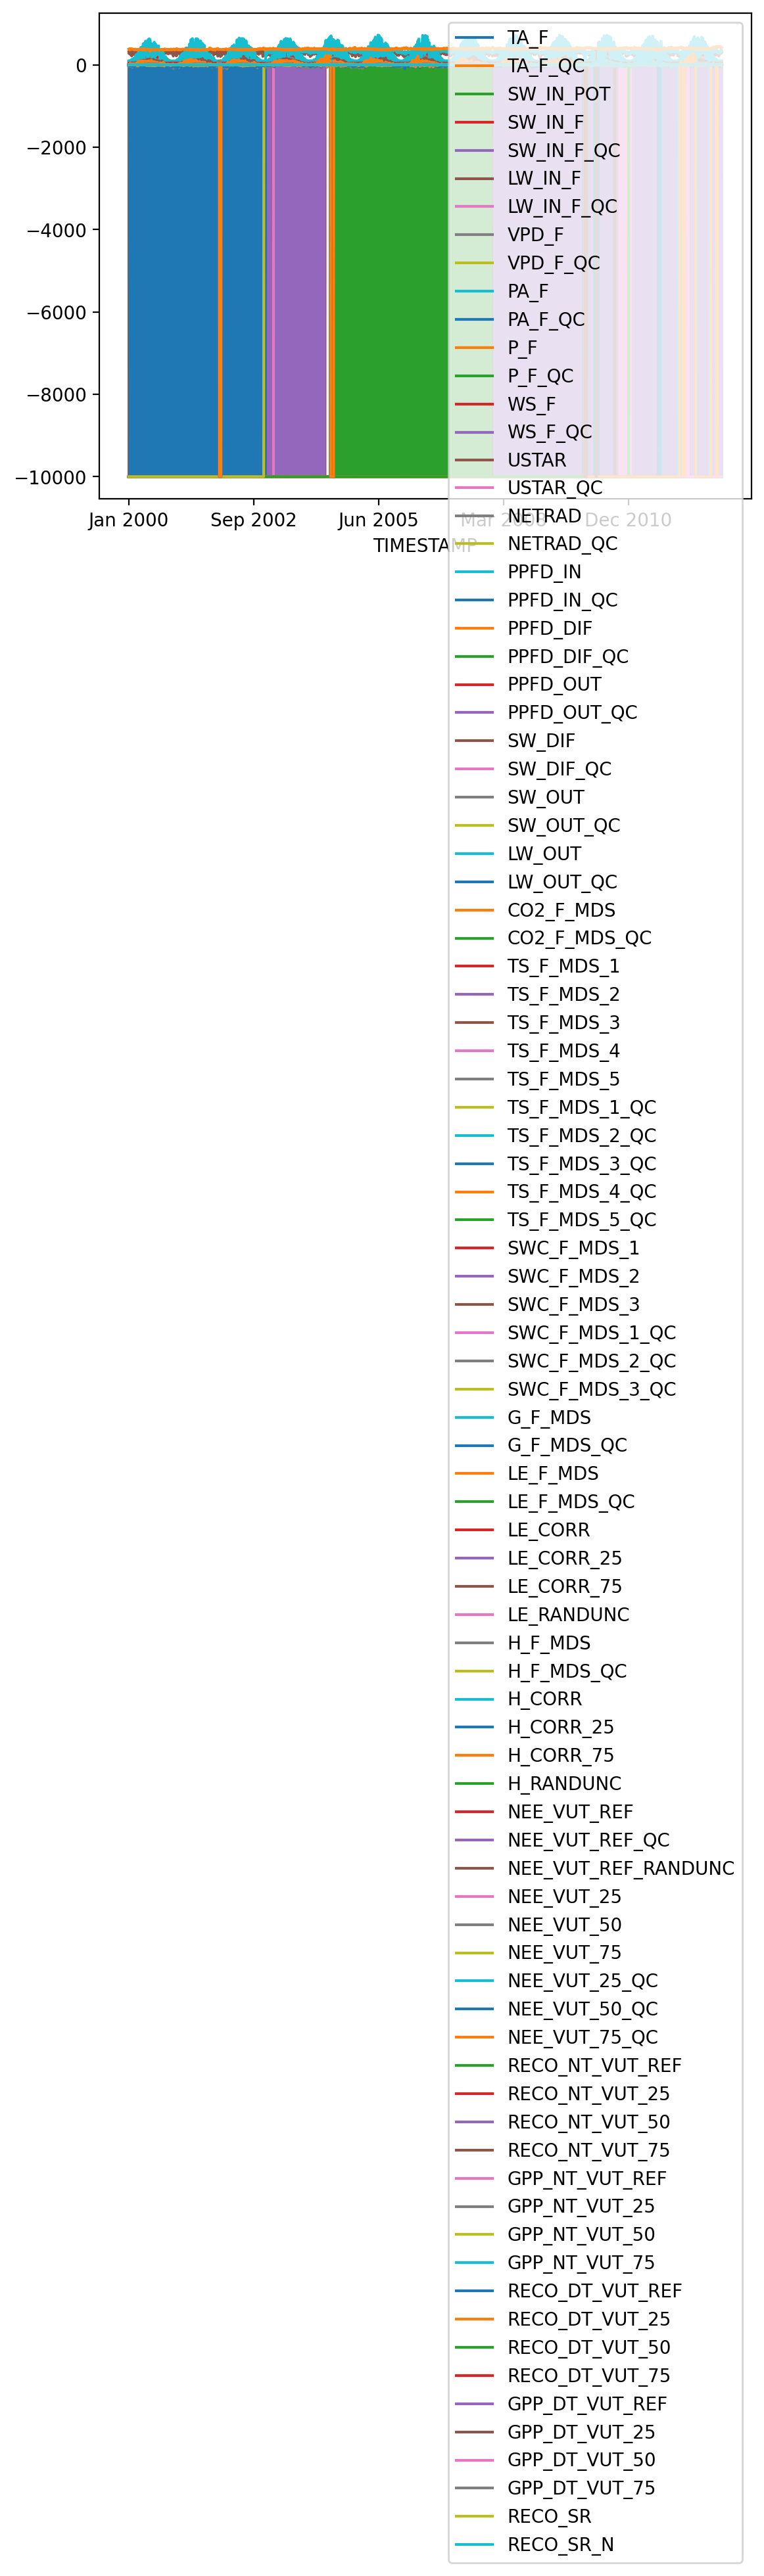

In [6]:
DE_Hai.plot()

In [7]:
#groupregimesplot(DE_Hai,climate,eco,2,50,3)
#yearlygroupregimeplot()

In [8]:
yearlygroupregimeplot(DE_Hai,climate,eco,3,50,2006,2010,title='DE_Hainich')

KeyError: 'TIMESTAMP'

In [ ]:
FR_Pue=pd.read_csv(r'../datasets/comparisonsites/FLX_FR-Pue_FLUXNET2015_SUBSET_DD_2000-2014_2-4.csv')
yearlygroupregimeplot(FR_Pue,climate,eco,3,50,2006,2010,title='Fr_Pue')

In [ ]:
#df_list={}
#for j,df in enumerate(Forest_list):
    #df_cli=clustereddf(df,climate,3,100)#['Clusters']
    #df_eco=clustereddf(df,eco,3,100)
#    df_list[j]=df_cli,df_eco


#df_cli=clustereddf(DE_Hai,climate,2,40)#['Clusters']
#df_eco=clustereddf(DE_Hai,eco,2,80)
#df_list=[df_cli,df_eco]

In [ ]:
#groupregimesplot(Forest_list[0],climate,eco,3,40,5)

In [ ]:
#groupregimesplot(Forest_list[1],climate,eco,3,50,3)

In [ ]:
#groupregimesplot(Forest_list[2],climate,eco,3,40,5)

In [ ]:
#groupregimesplot(Forest_list[3],climate,eco,3,40,5)

In [ ]:
#groupregimesplot(Forest_list[4],climate,eco,3,40,5)

In [ ]:
#reading of the data for each site
Crop_list=[]
for file_name in glob.glob('../datasets/Subsets_Crop/'+'*.csv'):
    Crop_list.append(  pd.read_csv(file_name))

In [ ]:
#groupregimesplot(Crop_list[0],climate,eco,3,40,3)

In [ ]:
#groupregimesplot(Crop_list[1],climate,eco,3,40,5)

In [ ]:
#groupregimesplot(Crop_list[2],climate,eco,3,60,5)

In [ ]:
#groupregimesplot(Crop_list[3],climate,eco,3,40,5)

In [ ]:
#groupregimesplot(Crop_list[4],climate,eco,3,40,5)

In [ ]:
#groupregimesplot(Forest_list[0],climate,eco,2,40,5)